<font size="45">Housing Analysis</font>

<font size="5">Overview</font>

This project analyses which features and amounts my client should focus on when searching for a house in Washington given their overall budget. After an analysis of the 2015 King County House Sale dataset, I was able to supply my client with valuable information. The recommended features given were 2 bedroom houses, 1 bathroom houses, 1 floor level houses, or houses with no more than 100 square footage of living. 

<font size="5">Business Understanding</font>

This is 2015 and I am an Data analysist. I was hired by my client to help determine house features that they should keep an eye out for when house searching. My client is searching for a home that is not older than 1965 while having a budget of $700,000. I will be using the 2015 King County House Sales dataset to estimate a combination of house features and amounts that fit within the given budget for homes in the Washington area. Some features that my client is interested in are bedrooms, bathrooms, square foot living, square foot above, square foot basement, square foot lot, floors, latitude, and longitude, and the house age. My predictions are important because I am giving my client advice that is backed by data which will provide them with the best scenerios possible. My advice to my clients are more genuine than most since I am not trying to persaude anyone to by a house that may be overpriced. 

<font size="5">Data Understanding</font>

This data is from 2015 King County House Sales dataset. This data relates to the data analysis question because is contains the prices these house were sold for and features. Some features within this dataset are bedrooms, bathrooms, square foot living, the year buit, etc. The target varible for these homes in Washington are the prices.

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [2]:
# Reading in a csv file using pandas and showing the first 5 rows
df = pd.read_csv('../data/kc_house_data.csv', parse_dates=['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Description of data in Dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Shows information about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

<font size="5">Data Preparation </font>

In [5]:
# Making a new Dataset containing the features of interest and showing the first 5 rows
df_f = df[['price', 'bedrooms', 'bathrooms','sqft_living','sqft_lot','sqft_above' ,'floors', 'lat', 'long']]
df_f.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,lat,long
0,221900.0,3,1.00,1180,5650,1180,1.0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2170,2.0,47.7210,-122.319
2,180000.0,2,1.00,770,10000,770,1.0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1050,1.0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1680,1.0,47.6168,-122.045


In [6]:
# Making a new column that shows the basement square footage
df_f['basement_sqft'] = df['sqft_living'] - df['sqft_above']
df_f['age_years'] = 2015 - df['yr_built']
df_f.head()

<ipython-input-6-8037c2bfd7c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['basement_sqft'] = df['sqft_living'] - df['sqft_above']
<ipython-input-6-8037c2bfd7c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['age_years'] = 2015 - df['yr_built']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,lat,long,basement_sqft,age_years
0,221900.0,3,1.00,1180,5650,1180,1.0,47.5112,-122.257,0,60
1,538000.0,3,2.25,2570,7242,2170,2.0,47.7210,-122.319,400,64
2,180000.0,2,1.00,770,10000,770,1.0,47.7379,-122.233,0,82
3,604000.0,4,3.00,1960,5000,1050,1.0,47.5208,-122.393,910,50
4,510000.0,3,2.00,1680,8080,1680,1.0,47.6168,-122.045,0,28


In [7]:
# Shows information about the new Dataframe
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   sqft_above     21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   lat            21597 non-null  float64
 8   long           21597 non-null  float64
 9   basement_sqft  21597 non-null  int64  
 10  age_years      21597 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.8 MB


In [8]:
# Description of data in new Dataframe
df_f.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,lat,long,basement_sqft,age_years
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1788.596842,1.494096,47.560093,-122.213982,291.725008,44.000324
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,827.759761,0.539683,0.138552,0.140724,442.667800,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,370.000000,1.000000,47.155900,-122.519000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1190.000000,1.000000,47.471100,-122.328000,0.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1560.000000,1.500000,47.571800,-122.231000,0.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2210.000000,2.000000,47.678000,-122.125000,560.000000,64.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,3.500000,47.777600,-121.315000,4820.000000,115.000000


<font size="5">Modeling</font>

For my first model I used a kitchen sink approach, by using all of the features from the filtered dataset except the target, with no Train Test Split. I used a standard scaler to scale the features to there respective z-score. It's useful to have all of our variables on the same scale, so that the resulting coefficients are easier to interpret. After creating this model, the results showed 61.1% variance in our house price. The Condition Number is 7.73e+15 and this shows that were is perhaps multicolinearity between the features. The overall model was statistically significant but the square footage of the lot was not inidividually. The Residual Sum of Squares (RSS) for this model was 1133793614903719, which calculated how bad our line of best fit is. Because of high correlations for multicolineairty, I am going to drop the square foot living and the bathroom feature. Because of low linearity correlations, I am going to drop the longitude and floor features.

For my second model I dropped features longitude, floors, square foot living, bathroom, our target, and proceeded with a Train Test Split. Train Test Split makes sure the model is ready for the real world so it can predict off data it hasnt seen before. It also is a way to balance between Bias and Variance. This second model showed 59.7% variance in our house price with a condition number of 2.27. The overall model was statistically significant. The root mean square error, which explains how spread out the residuals are, is 228240.59. There are not high correlations between the features, the errors are normally distributed

For my third and final model I did a kitchen stink approach while doing a Train Test Split. The only feature that was dropped for this model was the target house price. A Train test Split was done to put the model into production by getting it ready to preform on data never seen. Standard scaler was used to so that all features were in the same unit. After creating this model, there turn out to be 61% variance in the house price with a condition numer of 7.62e+15. The overall model and individual features were statistically significant. The root mean square error was 225099.13. Even though there is high correlation between some features and a low correlation between house age and price, based on the R2 score this would be the finally model that would work best for the business problem

<font size="5">Baseline Understanding</font>

Without modeling this is the simplest, yet dumbest, way the house prices could be predicted by the features. By finding the mean between all house prices, this would give the average price that would be less convenient.

In [9]:
#  Setting a varible to the mean of all the house prices
y_mean = df_f['price'].mean()
y_preds = [y_mean] * len(df_f)
y_preds

[540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,


<font size="5">First $&(@# Model</font>

### MODEL 1: 
###     Kitchen Sink Approach - With No Train Test Split 

In [10]:
# Setting the X and y values
X = df_f.drop(columns='price')
y = df_f['price']
# Instantiate our scaler
scaler = StandardScaler()
# Fit our scaler
scaler.fit(X)
# Transform X value to scaled X value
X_scaled = scaler.transform(X)
# Create and fit our model
model_ntts = sm.OLS(y,sm.add_constant(X_scaled)).fit()
model_ntts.summary(xname=['Y-Intercept', *X.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     3767.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:27:34   Log-Likelihood:            -2.9720e+05
No. Observations:               21597   AIC:                         5.944e+05
Df Residuals:                   21587   BIC:                         5.945e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.403e+05   1559.460    346.464      0.000    5.37e+05    5.43e+05
bedrooms      -5.554e+04   1960.424    -28.331      0.000   -5.94e+04   -5.17e+04
bathrooms      4.908e+04   2819.614     17.406      0.000    4.36e+04    5.46e+04
sqft_living    1.405e+05   1331.169    105.560      0.000    1.38e+05    1.43e+05
sqft_lot      -1244.2487   1636.459     -0.760      0.447   -4451.828    1963.331
sqft_above     1.311e+05   1467.084     89.335      0.000    1.28e+05    1.34e+05
floors         5780.1474   2171.963      2.661      0.008    1522.940       1e+04
lat            8.411e+04   1616.198     52.039      0.000    8.09e+04    8.73e+04
long          -2.875e+04   1838.599    -15.637      0.000   -3.24e+04   -2.51e+04
basement_sqft  4.636e+04   1730.486     26.791      0.000     4.3e+04    4.98e+04
age_years      6.903e+04   2121.483     32.540      0.000    6.49e+04    7.32e+04
==============================================================================
Omnibus:                    16306.458   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           832503.485
Skew:                           3.153   Prob(JB):                         0.00
Kurtosis:                      32.755   Cond. No.                     7.73e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
# Create a dataset including the house prices, predicted house prices, and the difference between the 2
evalute_y_ntts = pd.DataFrame(y)
evalute_y_ntts['prediction'] = model_ntts.predict(sm.add_constant(X_scaled))
evalute_y_ntts['difference'] = abs(evalute_y_ntts['prediction'] - evalute_y_ntts['price'])
evalute_y_ntts.head()

,price,prediction,difference
0,221900.0,238441.484625,16541.484625
1,538000.0,889706.306772,351706.306772
2,180000.0,355018.463803,175018.463803
3,604000.0,510370.443684,93629.556316
4,510000.0,403477.649809,106522.350191


In [12]:
# Calculate our residual - how wrong we are
residuals_ntts = y - evalute_y_ntts['prediction']
# Calculate the RSS to understand how bad our line of best fit it
RSS_ntts = sum(residuals_ntts**2)
RSS_ntts

1133793614903719.8

In [13]:
# Show the correlation between the features;
# want little to no correlation 
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,lat,long,basement_sqft,age_years
bedrooms,1.000000,0.514508,0.578212,0.032471,0.479386,0.177944,-0.009951,0.132054,0.302808,-0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.686668,0.502582,0.024280,0.224903,0.283440,-0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.876448,0.353953,0.052155,0.241214,0.435130,-0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,0.184139,-0.004814,-0.085514,0.230227,0.015418,-0.052946
sqft_above,0.479386,0.686668,0.876448,0.184139,1.000000,0.523989,-0.001199,0.344842,-0.052156,-0.424037
floors,0.177944,0.502582,0.353953,-0.004814,0.523989,1.000000,0.049239,0.125943,-0.245715,-0.489193
lat,-0.009951,0.024280,0.052155,-0.085514,-0.001199,0.049239,1.000000,-0.135371,0.110414,0.148370
long,0.132054,0.224903,0.241214,0.230227,0.344842,0.125943,-0.135371,1.000000,-0.144546,-0.409993
basement_sqft,0.302808,0.283440,0.435130,0.015418,-0.052156,-0.245715,0.110414,-0.144546,1.000000,0.133064
age_years,-0.155670,-0.507173,-0.318152,-0.052946,-0.424037,-0.489193,0.148370,-0.409993,0.133064,1.000000


<font size="5">Modeling Iterations</font>

### MODEL 2:
### With Train Test Split

In [14]:
# Setting the X and y values; Dropping bathrooms, floor, longitude, and living square footage
X6 = df_f.drop(columns=['price','bathrooms','sqft_living', 'floors', 'long'])
y6 = df_f['price']
# Train test split, set test_size = .33, and set random_state = 42
X6_train, X6_test, y6_train, y6_test =train_test_split(X6, y6, test_size=0.33, random_state=42)

# Set varible equal to copy of X train
train6_df = X6_train.copy()
train6_df['target'] = y6_train

train6_df.head()

,bedrooms,sqft_lot,sqft_above,lat,basement_sqft,age_years,target
19709,5,5042,2470,47.6497,860,1,1380000.0
4800,3,13862,1678,47.3744,0,21,353000.0
13225,4,15239,1370,47.4502,180,85,685000.0
16111,3,9471,1760,47.6760,1000,59,800000.0
17711,2,5810,1400,47.6843,0,75,575000.0


<AxesSubplot:>

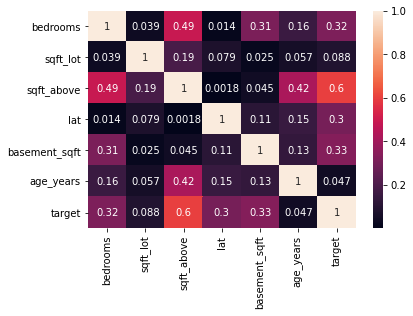

In [15]:
# Showing the correlation between the price and the individual features;
# Want a correlation closer to 1
sns.heatmap(abs(train6_df.corr()),annot=True)

In [16]:
# Orders the features correlation to the price in descending order
train6_df.corr()['target'].sort_values(ascending=False)

target           1.000000
sqft_above       0.601325
basement_sqft    0.334761
bedrooms         0.321212
lat              0.303543
sqft_lot         0.087953
age_years       -0.046539
Name: target, dtype: float64

In [17]:
# Instantiate our scaler
scaler = StandardScaler()
# Fit our scaler
scaler.fit(X6_train)
# Transform X value to scaled X value for X train and X test
X6_train_scaled = scaler.transform(X6_train)
X6_test_scaled = scaler.transform(X6_test)

# Second Model Scaled
model6 = sm.OLS(y6_train, sm.add_constant(X6_train_scaled)).fit()
model6.summary(xname=['Y-Intercept', *X6.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3567.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:27:48   Log-Likelihood:            -1.9948e+05
No. Observations:               14469   AIC:                         3.990e+05
Df Residuals:                   14462   BIC:                         3.990e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1954.688    277.326      0.000    5.38e+05    5.46e+05
bedrooms      -5.133e+04   2451.543    -20.938      0.000   -5.61e+04   -4.65e+04
sqft_lot      -1.225e+04   2009.144     -6.097      0.000   -1.62e+04   -8311.890
sqft_above     2.822e+05   2559.663    110.266      0.000    2.77e+05    2.87e+05
lat            8.673e+04   2005.016     43.258      0.000    8.28e+04    9.07e+04
basement_sqft  1.352e+05   2153.751     62.770      0.000    1.31e+05    1.39e+05
age_years      6.127e+04   2201.565     27.830      0.000     5.7e+04    6.56e+04
==============================================================================
Omnibus:                    10350.532   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           395286.892
Skew:                           2.992   Prob(JB):                         0.00
Kurtosis:                      27.897   Cond. No.                         2.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Create a dataset including the house prices, predicted house prices, and the difference between the 2
evalute_y6 = pd.DataFrame(y6_test)
evalute_y6['prediction'] = model6.predict(sm.add_constant(X6_test_scaled))
evalute_y6['difference'] = abs(evalute_y6['prediction'] - evalute_y6['price'])
evalute_y6.head()

,price,prediction,difference
3686,132500.0,164807.547505,32307.547505
10247,415000.0,507106.929863,92106.929863
4037,494000.0,311601.896584,182398.103416
3437,355000.0,264723.459592,90276.540408
19291,606000.0,479560.206748,126439.793252


In [19]:
# Grab Model predictions
train6_preds = model6.predict(sm.add_constant(X6_train_scaled))
test6_preds = model6.predict(sm.add_constant(X6_test_scaled))
# Use sklearn's r2_score to score our model
print(f"Model6 Train R2: {r2_score(y6_train, train6_preds)}")
print(f"Model6 Test R2: {r2_score(y6_test, test6_preds)}")
print(f"Model6 Test RMSE: {mse(y6_test, test6_preds, squared = False)}")

Model6 Train R2: 0.5967276998651494
Model6 Test R2: 0.6015384409971735
Model6 Test RMSE: 228240.58742507463


In [20]:
# Calculate our residual - how wrong we are
residuals6 = y6_test-test6_preds
# Calculate the RSS to understand how bad our line of best fit it
RSS6 = sum(residuals6**2)
RSS6

371324362252764.4

<AxesSubplot:>

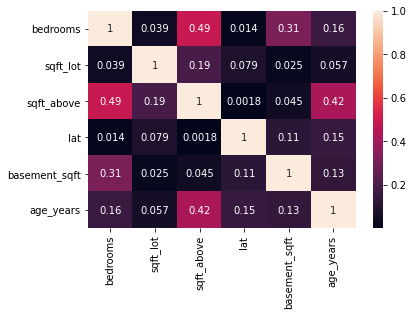

In [21]:
# Showing the correlation between the features;
# Want a correlation closer to 0
sns.heatmap(abs(X6_train.corr()),annot=True)

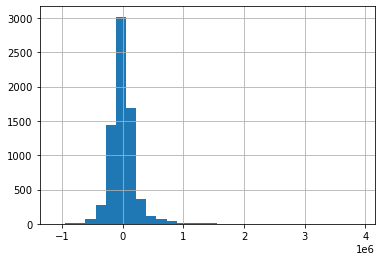

In [22]:
# Histogram of the residuals
residuals6[abs(residuals6) > 1].hist(bins=30);

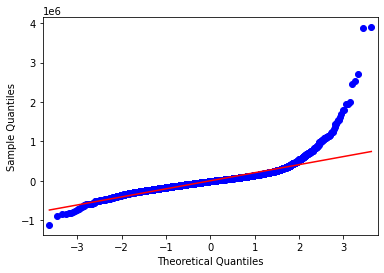

In [23]:
# QQ-Plot; When the errors are normal they will follow the diagonal line closely
sm.qqplot(residuals6, line='r');

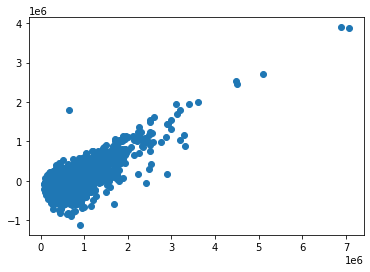

In [24]:
# scatter plot of the residuals and target values 
# look to see if they are more or less spread out at different places
fig, ax = plt.subplots()
ax.scatter(y6_test, residuals6);

<font size="5">Final Model</font>

### Model 3:
###     Kitchen Sink Approach - With Train Test Split 

In [25]:
# Setting the X and y values - using all features
X = df_f.drop(columns='price')
y = df_f['price']
# Train test split, set test_size = .33, and set random_state = 42
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=42)
# Set varible equal to copy of X train
train_df = X_train.copy()
train_df['target'] = y_train

train_df.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,lat,long,basement_sqft,age_years,target
19709,5,3.75,3330,5042,2470,2.0,47.6497,-122.339,860,1,1380000.0
4800,3,2.00,1678,13862,1678,1.0,47.3744,-122.190,0,21,353000.0
13225,4,1.00,1550,15239,1370,1.5,47.4502,-122.378,180,85,685000.0


In [26]:
train_df.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,lat,long,basement_sqft,age_years,target
bedrooms,1.000000,0.530802,0.593719,0.039381,0.492576,0.182357,-0.014104,0.134689,0.313925,-0.155514,0.321212
bathrooms,0.530802,1.000000,0.760773,0.089418,0.690267,0.503681,0.031525,0.219310,0.291926,-0.495821,0.535071
sqft_living,0.593719,0.760773,1.000000,0.183421,0.876812,0.352124,0.051976,0.242544,0.440686,-0.313008,0.701469
sqft_lot,0.039381,0.089418,0.183421,1.000000,0.190645,-0.004557,-0.079332,0.233358,0.025161,-0.057133,0.087953
sqft_above,0.492576,0.690267,0.876812,0.190645,1.000000,0.523269,-0.001818,0.345686,-0.045227,-0.420487,0.601325
floors,0.182357,0.503681,0.352124,-0.004557,0.523269,1.000000,0.049980,0.126320,-0.245313,-0.488199,0.256883
lat,-0.014104,0.031525,0.051976,-0.079332,-0.001818,0.049980,1.000000,-0.134008,0.111379,0.153226,0.303543
long,0.134689,0.219310,0.242544,0.233358,0.345686,0.126320,-0.134008,1.000000,-0.141449,-0.412844,0.021893
basement_sqft,0.313925,0.291926,0.440686,0.025161,-0.045227,-0.245313,0.111379,-0.141449,1.000000,0.134699,0.334761
age_years,-0.155514,-0.495821,-0.313008,-0.057133,-0.420487,-0.488199,0.153226,-0.412844,0.134699,1.000000,-0.046539


<AxesSubplot:>

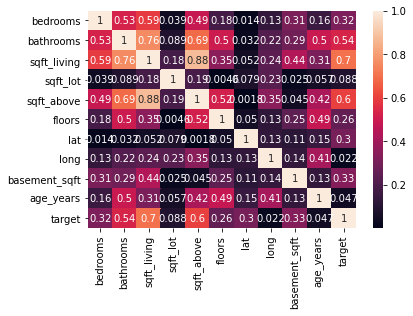

In [27]:
# Showing the correlation between the price and the individual features;
# Want a correlation closer to 1
sns.heatmap(abs(train_df.corr()), annot=True)

In [28]:
# Orders the features correlation to the price in descending order
train_df.corr()['target'].sort_values(ascending=False)

target           1.000000
sqft_living      0.701469
sqft_above       0.601325
bathrooms        0.535071
basement_sqft    0.334761
bedrooms         0.321212
lat              0.303543
floors           0.256883
sqft_lot         0.087953
long             0.021893
age_years       -0.046539
Name: target, dtype: float64

In [29]:
# Instantiate our scaler
scaler = StandardScaler()
# Fit our scaler
scaler.fit(X_train)
# Transform X value to scaled X value for X train and X test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Third model scaled
model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
model.summary(xname=['Y-Intercept', *X.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2512.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:28:07   Log-Likelihood:            -1.9924e+05
No. Observations:               14469   AIC:                         3.985e+05
Df Residuals:                   14459   BIC:                         3.986e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1922.728    281.936      0.000    5.38e+05    5.46e+05
bedrooms      -5.756e+04   2456.875    -23.428      0.000   -6.24e+04   -5.27e+04
bathrooms       5.26e+04   3506.600     15.001      0.000    4.57e+04    5.95e+04
sqft_living    1.407e+05   1660.490     84.732      0.000    1.37e+05    1.44e+05
sqft_lot      -4778.8223   2021.854     -2.364      0.018   -8741.915    -815.729
sqft_above     1.298e+05   1826.831     71.033      0.000    1.26e+05    1.33e+05
floors         8320.5798   2687.306      3.096      0.002    3053.115    1.36e+04
lat            8.182e+04   1995.704     40.999      0.000    7.79e+04    8.57e+04
long          -2.686e+04   2271.319    -11.825      0.000   -3.13e+04   -2.24e+04
basement_sqft  5.006e+04   2146.095     23.324      0.000    4.58e+04    5.43e+04
age_years      7.193e+04   2609.538     27.563      0.000    6.68e+04     7.7e+04
==============================================================================
Omnibus:                    10310.256   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399073.734
Skew:                           2.969   Prob(JB):                         0.00
Kurtosis:                      28.034   Cond. No.                     7.62e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.31e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
# Create a dataset including the house prices, predicted house prices, and the difference between the 2
evalute_y = pd.DataFrame(y_test)
evalute_y['prediction'] = model.predict(sm.add_constant(X_test_scaled))
evalute_y['difference'] = abs(evalute_y['prediction'] - evalute_y['price'])
evalute_y.head()

,price,prediction,difference
3686,132500.0,142818.804322,10318.804322
10247,415000.0,466801.393770,51801.393770
4037,494000.0,229523.056476,264476.943524
3437,355000.0,271080.013835,83919.986165
19291,606000.0,445326.501467,160673.498533


In [31]:
# Grab Model predictions
train_preds = model.predict(sm.add_constant(X_train_scaled))
test_preds = model.predict(sm.add_constant(X_test_scaled))

# Use sklearn's r2_score to score our model
print(f"Model Train R2: {r2_score(y_train, train_preds)}")
print(f"Model Test R2: {r2_score(y_test, test_preds)}")
print(f"Model Test RMSE: {mse(y_test, test_preds, squared = False)}")

Model Train R2: 0.6098881818962667
Model Test R2: 0.6124316400122989
Model Test RMSE: 225099.13136037713


In [32]:
# Calculate our residual - how wrong we are
residuals = y_test-test_preds
# Calculate the RSS to understand how bad our line of best fit it
RSS = sum(residuals**2)
RSS

361173043798590.44

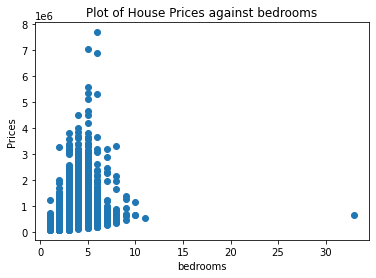

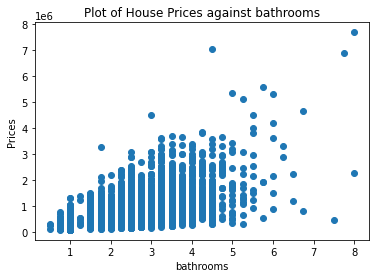

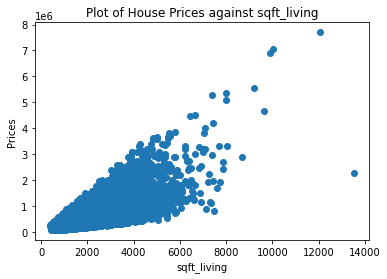

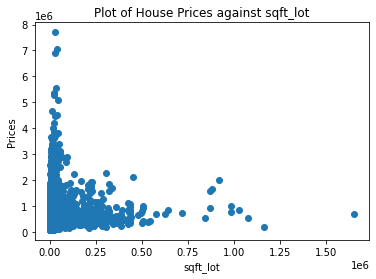

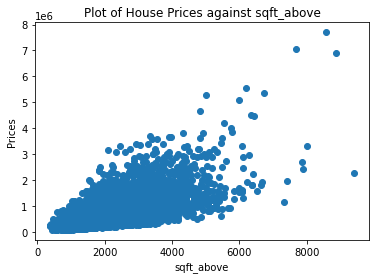

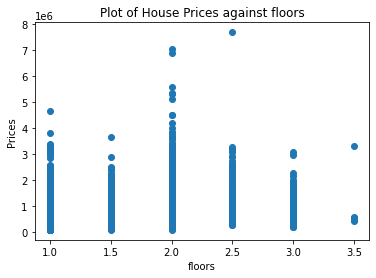

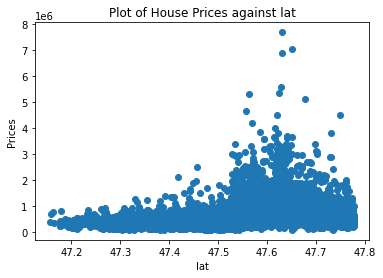

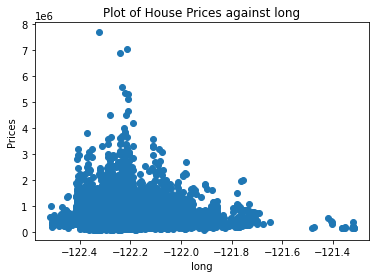

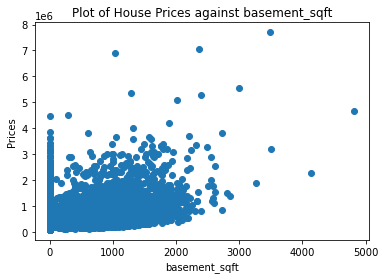

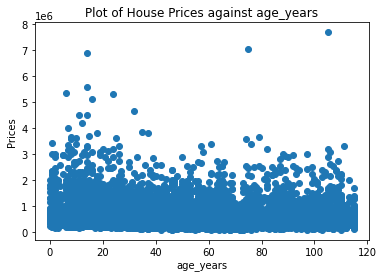

In [33]:
features = X.columns

for x in features:
    plt.scatter(X[x], y)
    plt.title(f'Plot of House Prices against {x}')
    plt.xlabel(x)
    plt.ylabel('Prices')
    plt.show()

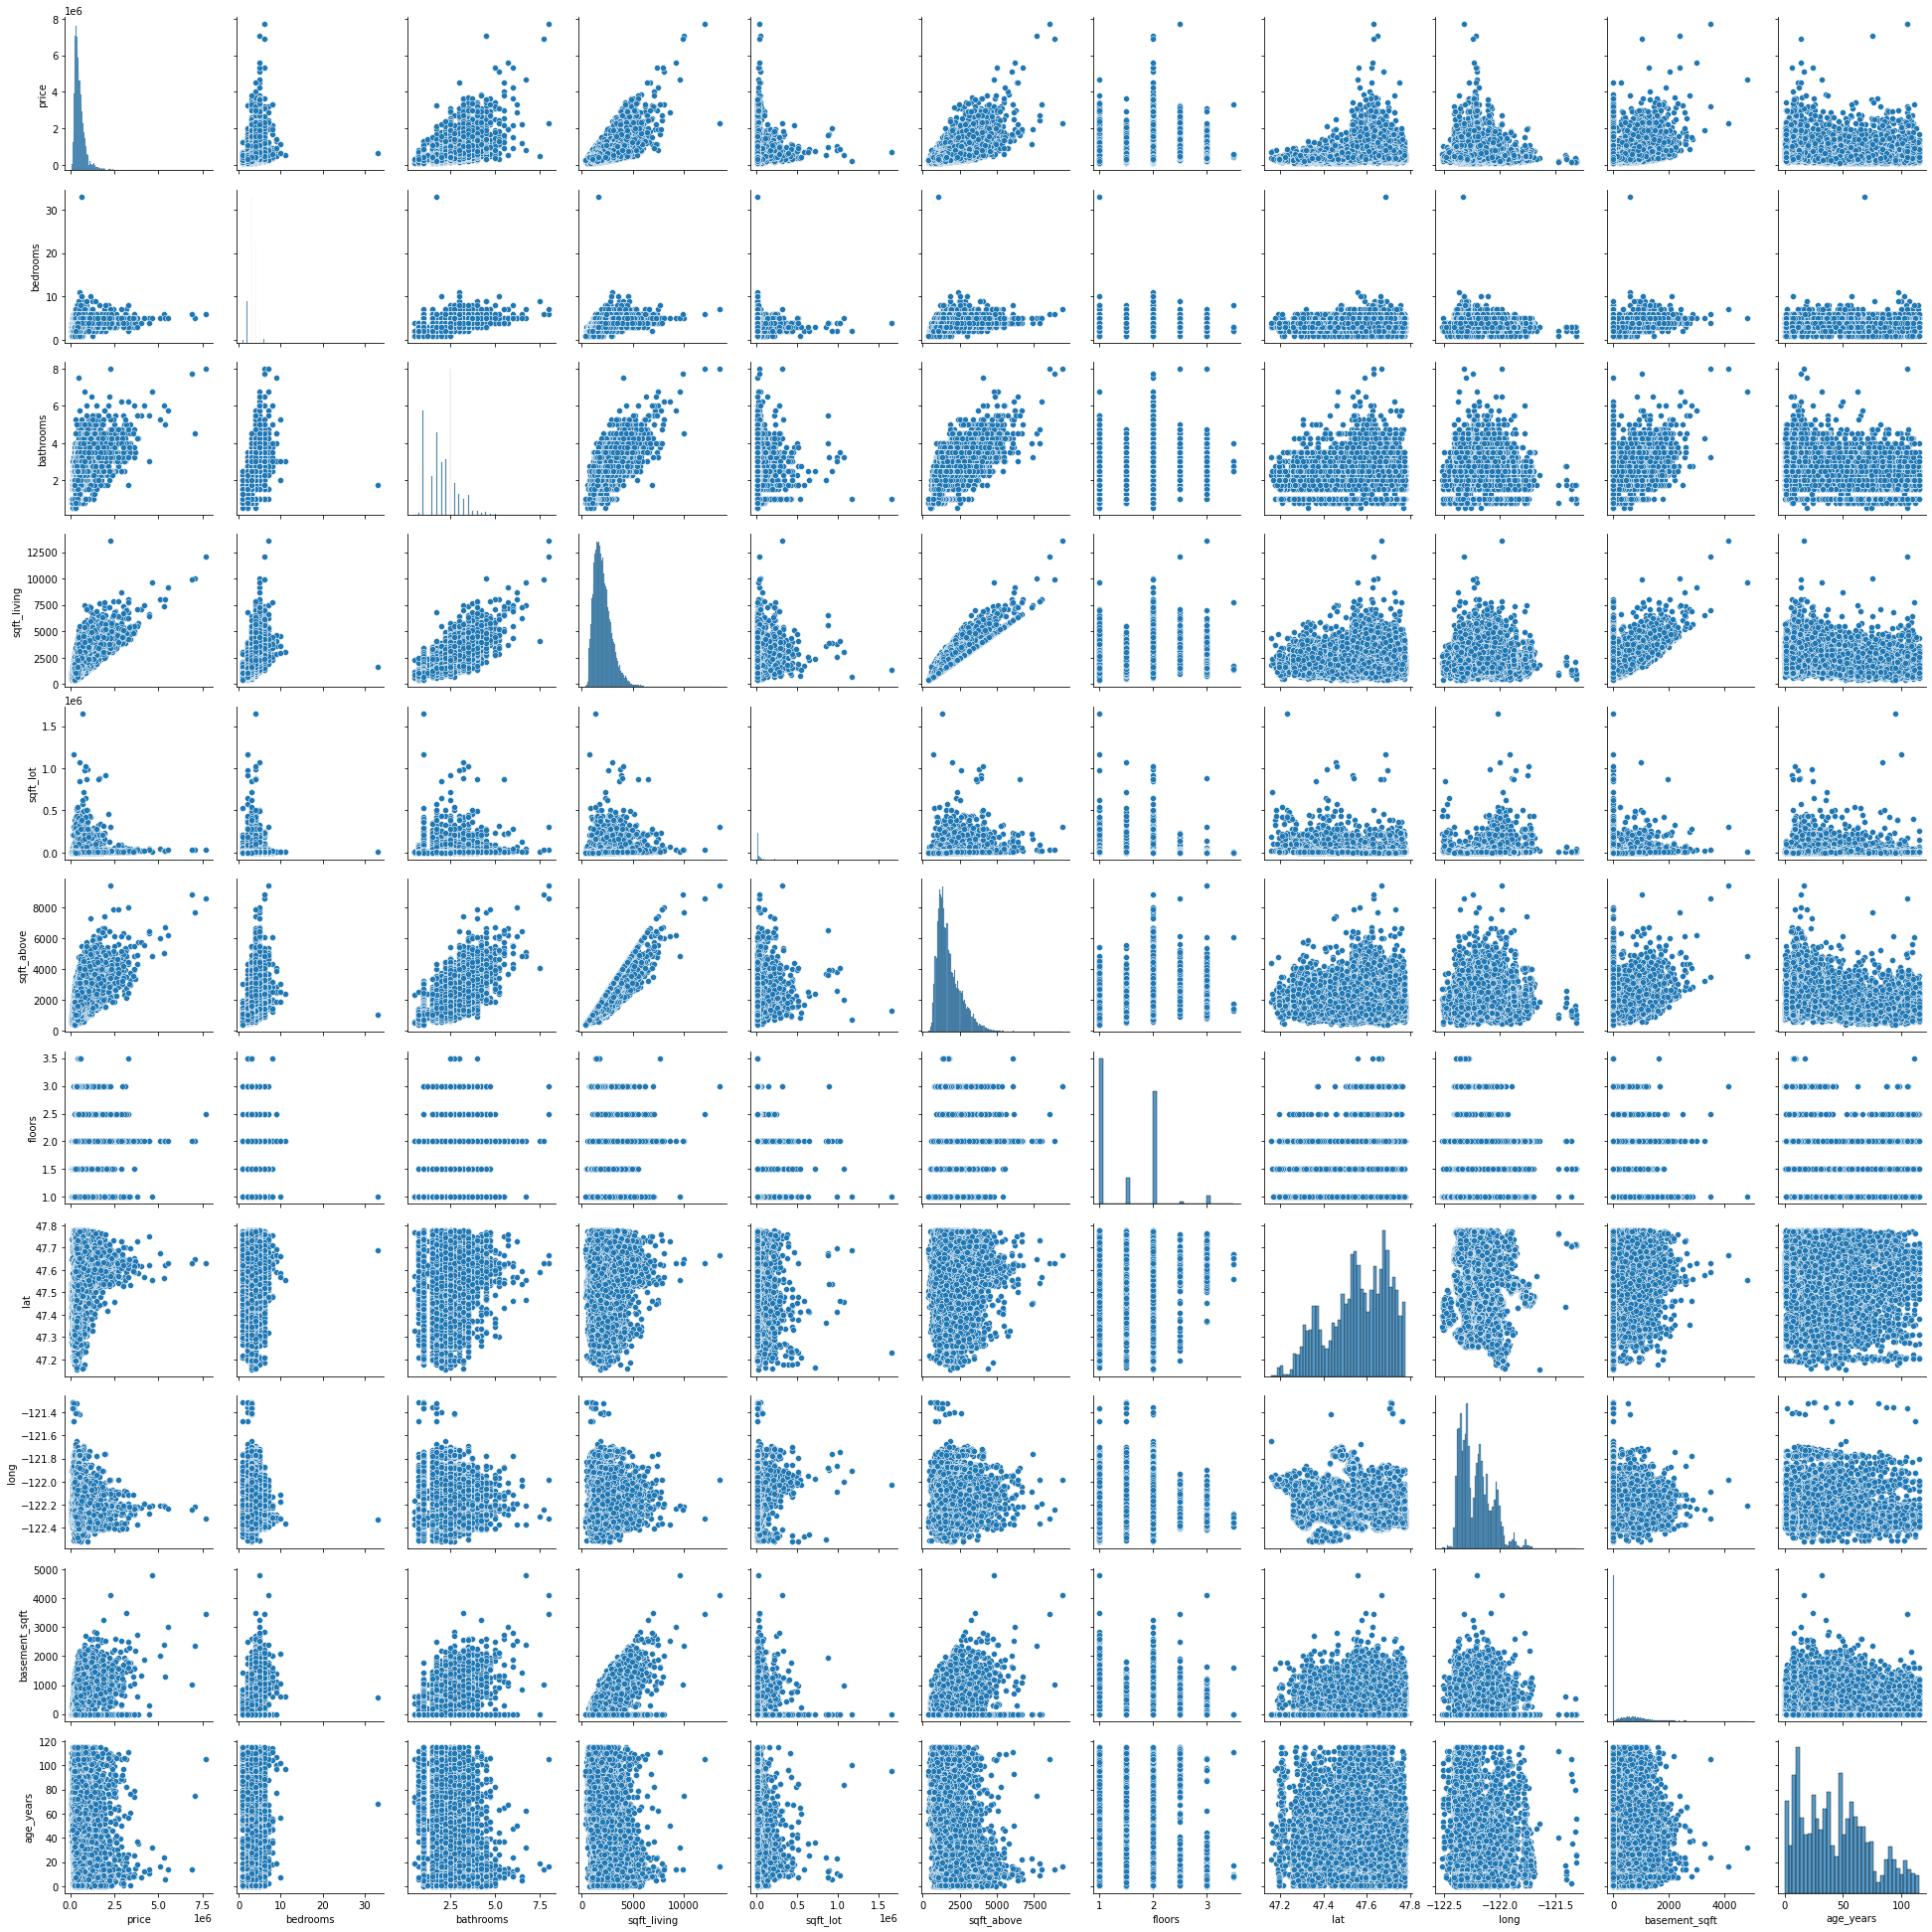

In [34]:
sns.pairplot(df_f)
plt.show()

<AxesSubplot:>

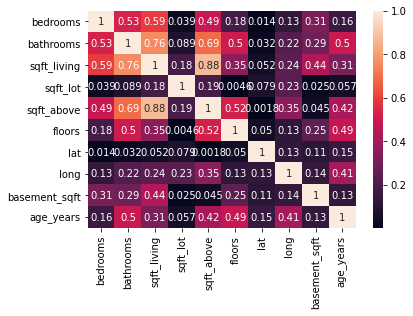

In [35]:
# Showing the correlation between the features;
# Want a correlation closer to 0
sns.heatmap(abs(X_train.corr()),annot= True)

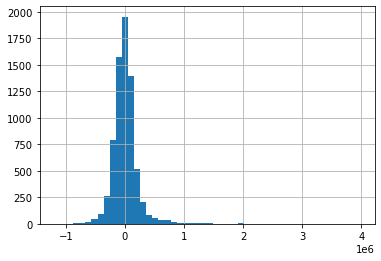

In [36]:
# Histogram of the residuals
residuals.hist(bins=50);

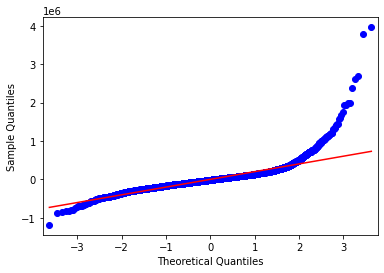

In [37]:
# QQ-Plot; When the errors are normal they will follow the diagonal line closely
sm.qqplot(residuals, line='r');

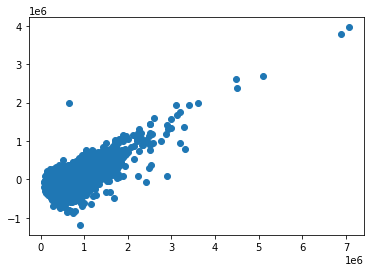

In [38]:
# scatter plot of the residuals and target values 
# look to see if they are more or less spread out at different places
fig, ax = plt.subplots()
ax.scatter(y_test, residuals);

In [39]:
# Show y-intercept and slopes 
model.params

const    542085.833022
x1       -57559.941628
x2        52603.769931
x3       140696.819447
x4        -4778.822334
x5       129764.606930
x6         8320.579809
x7        81822.673316
x8       -26858.636231
x9        50055.153308
x10       71927.997232
dtype: float64

<font size="5">Conclusion</font>

This Data analysis leads to some recommendations that will allow my client to purchase a house in the Washington area, 47°N,-122°W, without going over budget. 
- **Look for houses with no more than 2 bedrooms**
- **Look for houses with 1 bathroom**
- **Look for houses with no more than 100 sqaure feet in living area**
- **Look for houses with only 1 floor level, No basement**

If I were to use this dataset for another client I would consider inluding more features, perhaps the zipcode, grade, and conditions
- **The zipcode is used by the United States Postal Code**
- **The overall grade is related to the construction and design of the house**
- **The overall condition of the house is realted to the maintence**